In [97]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [98]:
image1 = cv.imread("set2.png")
img_gray1 = cv.cvtColor(image1, cv.COLOR_BGR2GRAY)

# might want to explore adaptive thresholding
ret, thresh1 = cv.threshold(img_gray1, 200, 255, cv.THRESH_BINARY)

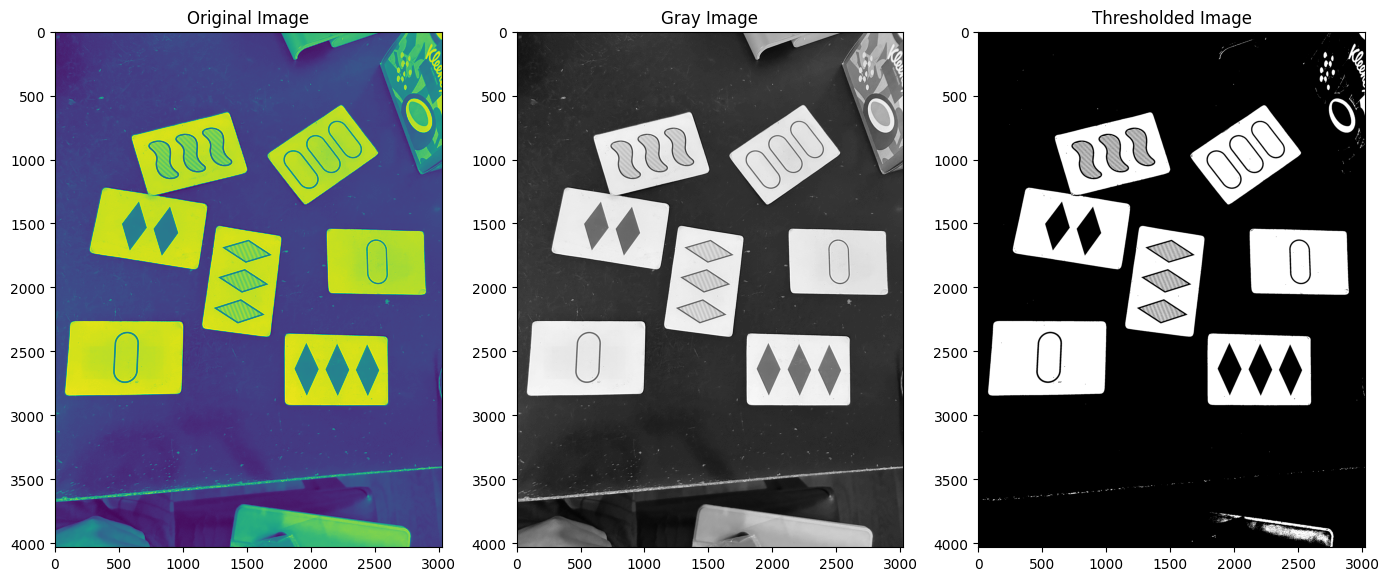

In [99]:
# creates a plot 14in x 6in
plt.figure(figsize = (14, 6))

# creates a plot: 1 row, 3 columns, 1st entry
plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(image1, cv.COLOR_BGR2GRAY))
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(img_gray1, cmap = "gray")
plt.title("Gray Image")

plt.subplot(1, 3, 3)
plt.imshow(thresh1, cmap = "gray")
plt.title("Thresholded Image")

plt.tight_layout()
plt.show()

7


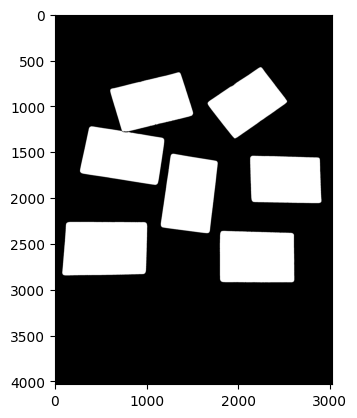

In [100]:
# detect the contours on the binary image (thresh1)
# - RETR_TREE is how the contours will be returned
#   - a little more on hierarchy: each contour has a 4 element array, 
#      next contour, previous contour, next child contour, parent contour
# - countours are a series of points, and sometimes the points can be lessen/simplifed
#   CHAIN_APPROX_NONE tells us not to simplify it, and to keep all contour points
contours1, hierarchy1 = cv.findContours(image = thresh1,
                                        mode = cv.RETR_TREE,
                                        method = cv.CHAIN_APPROX_SIMPLE)

filtered_contours = []
for contour in contours1:
    area = cv.contourArea(contour)
    if area > 100000:
        filtered_contours.append(contour)

        # showing the contours we filtered. uint8 means they are unsigned 8-bit ints
        blank_image = np.zeros(image1.shape, np.uint8)
        # pts is a list of contours
        # the contours are filled white
        cv.fillPoly(blank_image, pts = filtered_contours, color = (255, 255, 255))
        plt.imshow(blank_image)
print(len(filtered_contours))

# draw contours on the original image
# contourIndex = -1 tells us to draw all contours
# Line_AA stands for anti-aliasing. Just makes the lines look better
image_contours1 = cv.drawContours(image = image1.copy(),
                                  contours = filtered_contours, 
                                  contourIdx = -1,
                                  color = (255, 0, 0),
                                  thickness = 10,
                                  lineType = cv.LINE_AA)

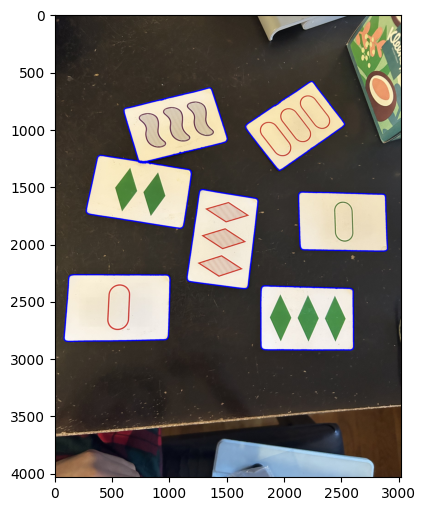

In [101]:
plt.figure(figsize = (10, 6))

# MPL uses RGB, while cv uses BGR
plt.imshow(cv.cvtColor(image_contours1, cv.COLOR_BGR2RGB))

In [ ]:
# we want to extract the image to train them 
# we might have to resize every card in the dataset to 120x80